In [1]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from ensure import ensure_annotations
from deepFakeDetection import logger

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [2]:
from deepFakeDetection.entity.config_entity import DataTransformationConfig

class DataTransformation:
    def __init__(self, config:DataTransformationConfig):
        self.config = config
        
    @ensure_annotations
    def create_spectrogram(audio_file: Path, image_file: Path):
        '''
        Create spectogram from input audio file
        '''
        try:
            fig = plt.figure()
            ax = fig.add_subplot(1, 1, 1)
            fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

            y, sr = librosa.load(audio_file)
            ms = librosa.feature.melspectrogram(y=y, sr=sr)
            log_ms = librosa.power_to_db(ms, ref=np.max)
            librosa.display.specshow(log_ms, sr=sr)

            fig.savefig(image_file)
            plt.close(fig)
        except Exception as e:
            raise e
    
    @ensure_annotations
    def create_pngs_from_wavs(src, dest):
        try:
            if not os.path.exists(dest):
                os.makedirs(dest)

            dir = os.listdir(src)
            logger.info(f"Transform data from {src} into {dest}")
            for i, file in enumerate(dir):
                input_file = os.path.join(src, file)
                output_file = os.path.join(dest, file.replace('.wav', '.png'))
                create_spectrogram(input_file, output_file)
        
            logger.info(f"Transformed data from {src} into {dest}")

        except Exception as e:
            raise e
   
    @ensure_annotations
    def transform_all_data(self):
        try:
            sub_dir_list = ["fake", "real"]
            dirs = os.listdir(self.config.input_dir)
            for dir in dirs:
                for sub_dir in sub_dir_list:
                    src = os.path.join(self.config.input_dir, dir, sub_dir)
                    dest = os.path.join(self.config.output_dir, dir, sub_dir)
                    create_pngs_from_wavs(src, dest)

        except Exception as e:
            raise e                


In [4]:
from deepFakeDetection.config.configuration import ConfigurationManager

config = ConfigurationManager()
data_transformation_config = config.get_data_transformation_config()

data_transformation = DataTransformation(config=data_transformation_config)
data_transformation.transform_all_data()

[2024-12-25 23:38:10,616: INFO: common: yaml file: /Users/wiwikkarlina/Documents/Escape_Plan/end-to-end-ml/config/config.yaml loaded successfully]
[2024-12-25 23:38:10,618: INFO: common: yaml file: /Users/wiwikkarlina/Documents/Escape_Plan/end-to-end-ml/params.yaml loaded successfully]
[2024-12-25 23:38:10,619: INFO: common: created directory at: artifacts]


In [12]:
input_path = "/Users/wiwikkarlina/Documents/Escape_Plan/end-to-end-ml/artifacts/data_ingestion/for-norm/"
dir = os.listdir(input_path)

for i in dir:
    print(i)

    input_dir = os.path.join(input_path, i, "fake")
    print(input_dir.replace("ingestion","transformation"))
    # create_pngs_from_wavs(input_dir, input_path+'/spectrograms_validation/fake')
    input_dir = os.path.join(input_path, i, "real")
    print(input_dir)
    # create_pngs_from_wavs(input_dir, input_path+'/spectrograms_validation/fake')

    # create_pngs_from_wavs(input_path+'/fake', input_path+'/spectrograms_validation/fake')


training
/Users/wiwikkarlina/Documents/Escape_Plan/end-to-end-ml/artifacts/data_transformation/for-norm/training/fake
/Users/wiwikkarlina/Documents/Escape_Plan/end-to-end-ml/artifacts/data_ingestion/for-norm/training/real
testing
/Users/wiwikkarlina/Documents/Escape_Plan/end-to-end-ml/artifacts/data_transformation/for-norm/testing/fake
/Users/wiwikkarlina/Documents/Escape_Plan/end-to-end-ml/artifacts/data_ingestion/for-norm/testing/real
validation
/Users/wiwikkarlina/Documents/Escape_Plan/end-to-end-ml/artifacts/data_transformation/for-norm/validation/fake
/Users/wiwikkarlina/Documents/Escape_Plan/end-to-end-ml/artifacts/data_ingestion/for-norm/validation/real


In [7]:
input_path = "/Users/wiwikkarlina/Documents/Escape_Plan/end-to-end-ml/data/for-norm/validation/"
dir = os.listdir(input_path)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/wiwikkarlina/Documents/Escape_Plan/end-to-end-ml/data/for-norm/validation/'

In [8]:
dir

['training', 'testing', 'validation']

In [13]:
create_pngs_from_wavs(input_path+'/fake', input_path+'/spectrograms_validation/fake')

In [6]:
create_pngs_from_wavs(input_path+'/real', input_path+'/spectrograms_validation/real')

In [1]:
import keras
keras.__version__

2024-12-22 23:46:51.901970: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.12.0'

In [8]:
from tensorflow.keras.utils import load_img, img_to_array 

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(img_to_array(load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

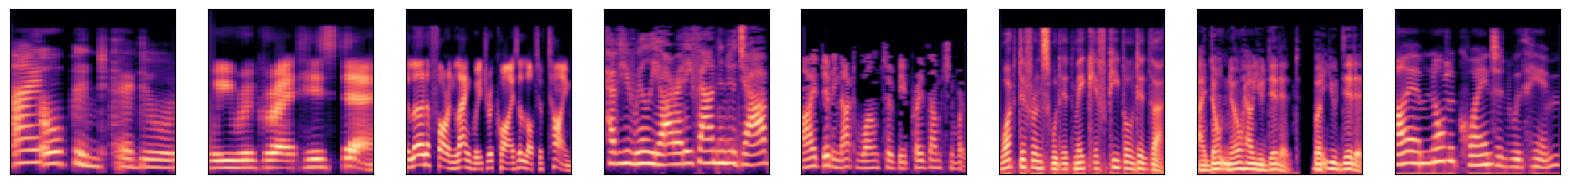

In [9]:
images, labels = load_images_from_path(input_path+'/spectrograms_validation/fake', 0)
show_images(images)
    
x += images
y += labels

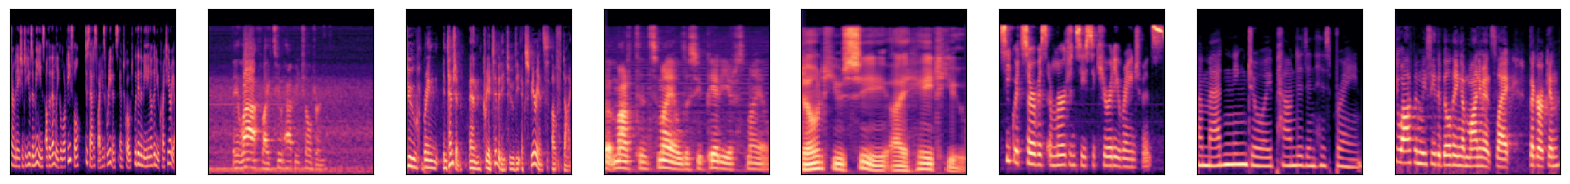

In [10]:
images, labels = load_images_from_path(input_path+'/spectrograms_validation/real', 1)
show_images(images)
    
x += images
y += labels

In [11]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.5, random_state=42)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [12]:
print('Train image shape',x_train_norm[0].shape, '\n', len(x_train_norm))
print('Train labels',y_train_encoded[0], '\n', y_train_encoded.shape)
print('Test image shape',x_test_norm[0].shape, '\n', len(x_test_norm))
print('Test labels',y_test_encoded[0:10], '\n', y_test_encoded.shape)

Train image shape (224, 224, 3) 
 5399
Train labels [0. 1.] 
 (5399, 2)
Test image shape (224, 224, 3) 
 5399
Test labels [[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]] 
 (5399, 2)


In [13]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2024-12-23 00:02:41.288148: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-23 00:02:41.290158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [14]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)


Epoch 1/10


2024-12-23 00:03:11.268448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-23 00:03:11.357284: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


540/540 [==============================] - ETA: 0s - loss: 0.2387 - accuracy: 0.9011

2024-12-23 00:03:46.465116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


540/540 [==============================] - 48s 77ms/step - loss: 0.2387 - accuracy: 0.9011 - val_loss: 0.1393 - val_accuracy: 0.9555
Epoch 2/10
540/540 [==============================] - 34s 63ms/step - loss: 0.1038 - accuracy: 0.9654 - val_loss: 0.0660 - val_accuracy: 0.9733
Epoch 3/10
540/540 [==============================] - 35s 65ms/step - loss: 0.0709 - accuracy: 0.9776 - val_loss: 0.0653 - val_accuracy: 0.9806
Epoch 4/10
540/540 [==============================] - 34s 62ms/step - loss: 0.0749 - accuracy: 0.9793 - val_loss: 0.0479 - val_accuracy: 0.9846
Epoch 5/10
540/540 [==============================] - 35s 64ms/step - loss: 0.0806 - accuracy: 0.9844 - val_loss: 0.0727 - val_accuracy: 0.9828
Epoch 6/10
540/540 [==============================] - 35s 64ms/step - loss: 0.3851 - accuracy: 0.9707 - val_loss: 0.9662 - val_accuracy: 0.9604
Epoch 7/10
540/540 [==============================] - 34s 63ms/step - loss: 0.8798 - accuracy: 0.9741 - val_loss: 0.6118 - val_accuracy: 0.9800
Epo

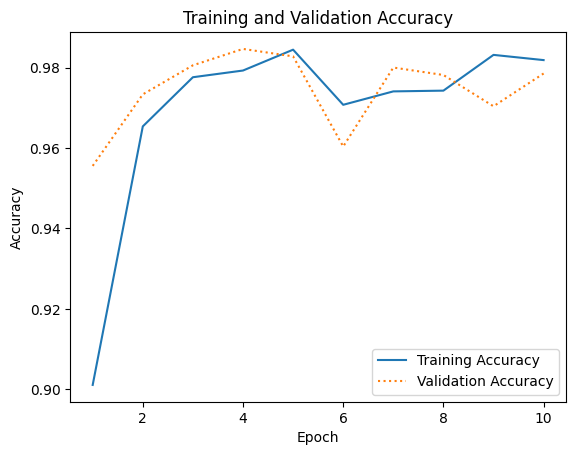

In [15]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()